In [1]:
using Distributions
using Statistics
using Random
using DataFrames
using StatsBase
using Plots

In [16]:
include("TestSetOverfitting.jl")

strategyType2ErrorProbability (generic function with 1 method)

# Max Sharpe Ratio Experiment
Validates the False Strategy Theorem experimentally

In [3]:
nTrials = round.(exp10.(range(1, stop=3, length=20)))
sort!(nTrials)
sr0 = DataFrame(nT = nTrials, ExpectedMaxSR = [expectedMaxSharpeRatio(Int(i), 0.0, 1.0) for i in nTrials])
sr1 = generatedMaxSharpeRatio(100, nTrials, 1, 0);


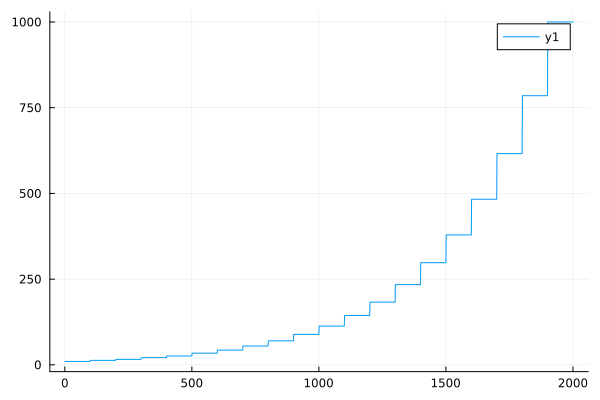

In [5]:
plot(sr1.nTrials)

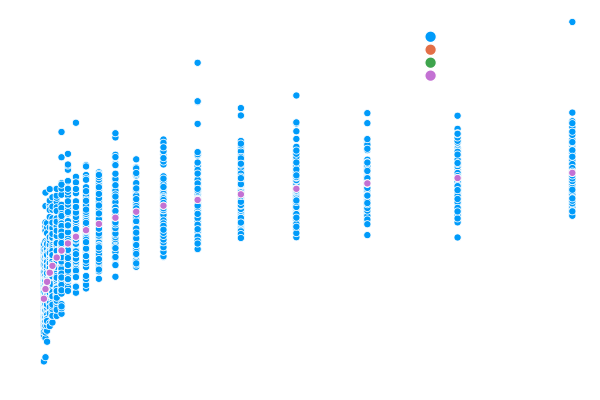

In [10]:
scatter(sr1.nTrials, sr1.maxSharpeRatio, label = "Experiment", background = :transparent)
scatter!(sr0.nT, sr0.ExpectedMaxSR, label = "Expected Max SR", background = :transparent)
xaxis!("nTrials")

# Mean and standard deviation of the predicted errors
Calculates mean and standard deviation of the predicted errors

In [17]:
nTrials = round.(exp10.(range(1, stop=4, length=40)))
sort!(nTrials)
stats = meanStdError(1000, 100, nTrials, 1.0, 0.0)

,meanErr,nTrials,stdErr
,Float64,Float64,Float64
1,0.00536803,10.0,0.00676212
2,0.000461195,12.0,0.00704889
3,-0.00136155,14.0,0.00687157
4,-0.00307518,17.0,0.0059977
5,-0.00388096,20.0,0.00573213
6,-0.00548395,24.0,0.00573499
7,-0.00744026,29.0,0.00566402
8,-0.00670064,35.0,0.00547186
9,-0.00717923,41.0,0.00500207


In [18]:
using Plots
Plots.scatter(nTrials[2:end], [stats.meanErr[2:end], stats.stdErr[2:end]], label = ["Mean" "Std"], xaxis = "nTrials", background = :transparent)

# Type I error probability
Calculates type I error probability of stratgies

In [ ]:
t, skew, kurt, k, freq=1250, -3, 10, 10, 250
sr = 1.25 / freq ^ 0.5
sr_ = 1 / freq ^ 0.5
z = estimatedSharpeRatioZStatistics(sr, t, 0, skew, kurt)
α_k = strategyType1ErrorProbability(z, k)
println(α_k)

# Type II error probability
Calculates type II error probability of stratgies

In [ ]:
t, skew, kurt, k, freq = 1250, -3, 10, 10, 250
sr = 1.25 / freq ^ 0.5
sr_ = 1 / freq ^ 0.5
z = estimatedSharpeRatioZStatistics(sr, t, 0, skew, kurt)
α_k = strategyType1ErrorProbability(z, k)
θ = thetaForType2Error(sr, t, sr_, skew, kurt)
β = strategyType2ErrorProbability(α_k, k, θ)
β_k = β^k
print(β_k)

In [ ]:
function calculateBeta(α, k)
    t, skew, kurt, freq = 1250, -3, 10, 250
    sr = 1.25 / freq ^ 0.5
    sr_ = 1 / freq ^ 0.5
    θ = thetaForType2Error(sr, t, sr_, skew, kurt)
    β = strategyType2ErrorProbability(α, k, θ)
    β_k = β^k
    return β_k
end    

β1 = [calculateBeta(0.01, i) for i in 1:0.5:25]
β2 = [calculateBeta(0.025, i) for i in 1:0.5:25]
β3 = [calculateBeta(0.005, i) for i in 1:0.5:25]

scatter(1:0.5:25, [β1, β2, β3], label = ["Beta 1" "Beta 2" "Beta 3"], xaxis = "Number of trials", background = :transparent)